# Title: MACHING LEARNING FOR PREDICTING HOUSE PRICES

The King County Housing Authority (KCHA) provides rental housing and rental assistance to more than 18,000 low and moderate income individuals and families throughout the county. KCHA transforms distressed communities through well-designed, higher density, mixed-income housing that utilize energy and water saving technologies.

<br>
<br>
<center><img src="Images/house2.jpg"  width="500" height = "150"></center>

<br>
<br>

## Introduction:

The United Nations Sustainable Development Goals includes a target for making cities and human
settlements inclusive, safe, resilient, and sustainable (Goal 11). A key outcome of this goal is to
provide opportunities for safe and affordable housing. The housing situation in Ghana is far from
the SDG target described above. As a result, it would be interesting to investigate the housing
situation in Ghana and provide an understanding of the housing situation. The goal of this project
therefore, is to use such an understanding to provide a description of places in the country that
provide the best options for budget accommodation.

## Project Description 
In this project, analysis is conducted on a dataset containing housing details from the King County, USA, the region where the city of Seattle is located. This is an end to end machine learning project which includes EDA and Predictive modelling using the various forms of regression. Linear Regeression, Lasso Regression and Ridge Regression




## Dataset Description:
The dataset used in this project was obtained from [source1](https://www.kaggle.com/harlfoxem/housesalesprediction?)<br>

The dataset contains 21 features and  21613 observations. The features include,
* price
* bedrooms
* bathrooms
* condition
* sqft_above

## Goal:

The analysis seeks to find;

* Explore the dataset
* Correlation analysis
* Outlier analysis
* Predict housing prices using machine learning



# Importation of libraries

In [1]:
#IMPORTATION OF LIBRARIES
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression as lr
from sklearn.preprocessing import OneHotEncoder as ohe
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor as dt
from sklearn.ensemble import RandomForestRegressor as rf
import pandas_profiling
%matplotlib inline

In [4]:
data=pd.read_csv('home_data.csv')


# Exploring the data
The dataset contains
* 21 features
* 21613 observations

In [5]:
data.head()

id             date   price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900         3       1.00         1180   
1  6414100192  20141209T000000  538000         3       2.25         2570   
2  5631500400  20150225T000000  180000         2       1.00          770   
3  2487200875  20141209T000000  604000         4       3.00         1960   
4  1954400510  20150218T000000  510000         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

## Summary statistics
### Key observations
1. Most of the columns have the mean being greater than the median (50%) mark <br>
2. Observation one implies the distribution of data in most of the columns is skewed to the right
3. There may exist outliers to the right
The table shows the summary statistics of the housing dataset

In [10]:
data.describe().T

count          mean           std           min  \
id             21613.0  4.580302e+09  2.876566e+09  1.000102e+06   
price          21613.0  5.400881e+05  3.671272e+05  7.500000e+04   
bedrooms       21613.0  3.370842e+00  9.300618e-01  0.000000e+00   
bathrooms      21613.0  2.114757e+00  7.701632e-01  0.000000e+00   
sqft_living    21613.0  2.079900e+03  9.184409e+02  2.900000e+02   
sqft_lot       21613.0  1.510697e+04  4.142051e+04  5.200000e+02   
floors         21613.0  1.494309e+00  5.399889e-01  1.000000e+00   
waterfront     21613.0  7.541757e-03  8.651720e-02  0.000000e+00   
view           21613.0  2.343034e-01  7.663176e-01  0.000000e+00   
condition      21613.0  3.409430e+00  6.507430e-01  1.000000e+00   
grade          21613.0  7.656873e+00  1.175459e+00  1.000000e+00   
sqft_above     21613.0  1.788391e+03  8.280910e+02  2.900000e+02   
sqft_basement  21613.0  2.915090e+02  4.425750e+02  0.000000e+00   
yr_built       21613.0  1.971005e+03  2.937341e+01  1.900000e+03   
yr_renovated   21613.0  8.440226e+01  4.016792e+02  0.000000e+00   
zipcode        21613.0  9.807794e+04  5.350503e+01  9.800100e+04   
lat            21613.0  4.756005e+01  1.385637e-01  4.715590e+01   
long           21613.0 -1.222139e+02  1.408283e-01 -1.225190e+02   
sqft_living15  21613.0  1.986552e+03  6.853913e+02  3.990000e+02   
sqft_lot15     21613.0  1.276846e+04  2.730418e+04  6.510000e+02   

                        25%           50%           75%           max  
id             2.123049e+09  3.904930e+09  7.308900e+09  9.900000e+09  
price          3.219500e+05  4.500000e+05  6.450000e+05  7.700000e+06  
bedrooms       3.000000e+00  3.000000e+00  4.000000e+00  3.300000e+01  
bathrooms      1.750000e+00  2.250000e+00  2.500000e+00  8.000000e+00  
sqft_living    1.427000e+03  1.910000e+03  2.550000e+03  1.354000e+04  
sqft_lot       5.040000e+03  7.618000e+03  1.068800e+04  1.651359e+06  
floors         1.000000e+00  1.500000e+00  2.000000e+00  3.500000e+00  
waterfront     0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  
view           0.000000e+00  0.000000e+00  0.000000e+00  4.000000e+00  
condition      3.000000e+00  3.000000e+00  4.000000e+00  5.000000e+00  
grade          7.000000e+00  7.000000e+00  8.000000e+00  1.300000e+01  
sqft_above     1.190000e+03  1.560000e+03  2.210000e+03  9.410000e+03  
sqft_basement  0.000000e+00  0.000000e+00  5.600000e+02  4.820000e+03  
yr_built       1.951000e+03  1.975000e+03  1.997000e+03  2.015000e+03  
yr_renovated   0.000000e+00  0.000000e+00  0.000000e+00  2.015000e+03  
zipcode        9.803300e+04  9.806500e+04  9.811800e+04  9.819900e+04  
lat            4.747100e+01  4.757180e+01  4.767800e+01  4.777760e+01  
long          -1.223280e+02 -1.222300e+02 -1.221250e+02 -1.213150e+02  
sqft_living15  1.490000e+03  1.840000e+03  2.360000e+03  6.210000e+03  
sqft_lot15     5.100000e+03  7.620000e+03  1.008300e+04  8.712000e+05

### Accounting for missing values and data types
The dataset has no missing values. <br>
The dataset contains 4, 16 and 1 column of type float, int(64) and object respectively.

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

### SIze and Dimension
* The dataset contains 21613 observations/rows
* The number of features/columns is 21 

In [12]:
print('Number of rows:',data.shape[0],'\nNumber of columns:',data.shape[1],'\n\nColumns\n',data.columns)


Number of rows: 21613 
Number of columns: 21 

Columns
 Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


## Plotting of histograms

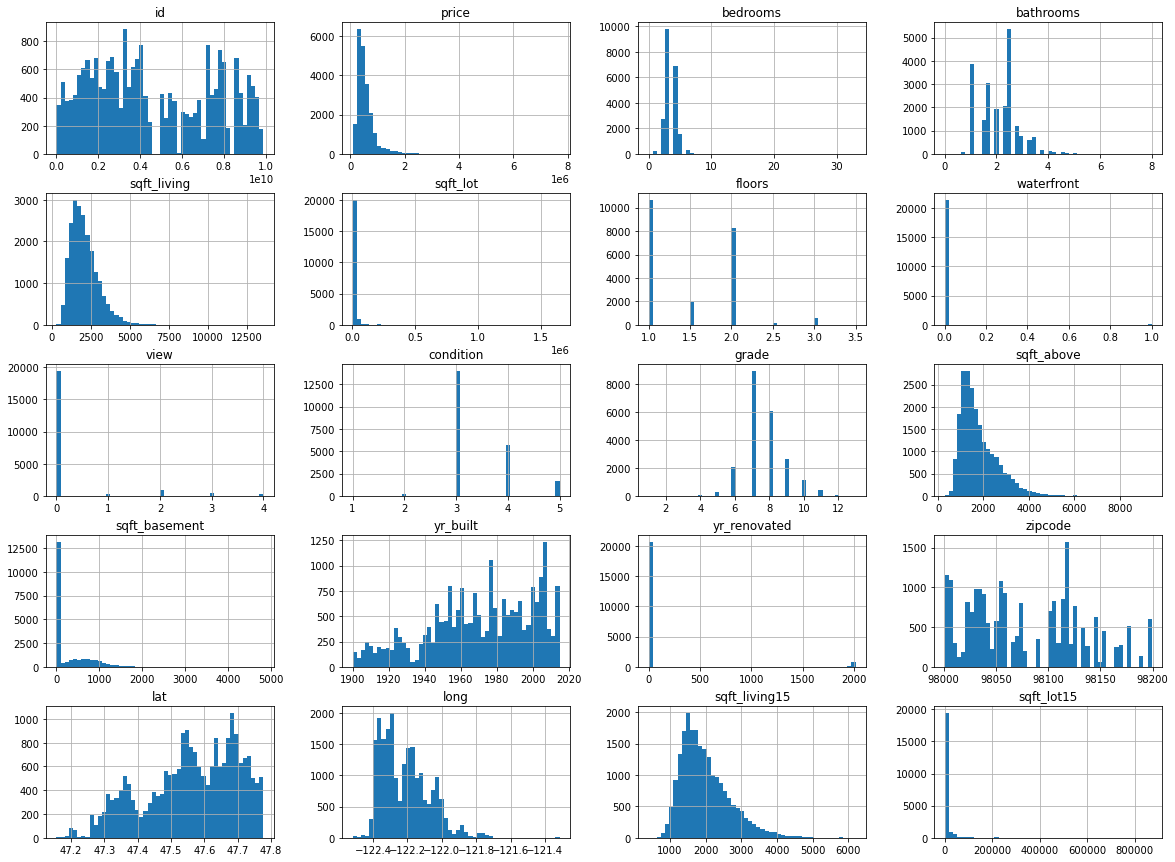

In [13]:
data.hist(bins=50,figsize=(20,15))
plt.show()

## Price Distribution
The price is normally distributed but heavily skewed to the right. This can be the cause of some otliers 
in the dataset.

In [14]:
import plotly.express as px
#df = px.data.tips()
fig = px.histogram(data, x="price")#,nbins=300
fig.show()

### Box plot
This plot clearly shows the outliers in the price data
* On of the house has as alarge as 33 bathrooms, which appears to be an extreme point
* There exist a house with 0 bedroom and 0 bathroom 

In [15]:
plt.figure(figsize=(12,8))
fig = px.box(data, x=['bedrooms','bathrooms','floors'],notched=True)
fig.show()

<Figure size 864x576 with 0 Axes>

In [16]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [17]:
#df = px.data.tips()
fig = px.box(data, ["sqft_above","sqft_living"])
fig.show();

In [18]:
data['bedrooms'].unique()
#data.columns

array([ 3,  2,  4,  5,  1,  6,  7,  0,  8,  9, 11, 10, 33], dtype=int64)

## Correlation Analysis
It can be observed the correlation between price and <br>
* bathrooms is 0.525
* sqft_living is 0.7
* sqft_above is 0.6
* sqft_living is 0.585

In [19]:
corr_matrix=data.corr()
corr_matrix

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id             1.000000 -0.016762  0.001286   0.005160    -0.012258 -0.132109   
price         -0.016762  1.000000  0.308350   0.525138     0.702035  0.089661   
bedrooms       0.001286  0.308350  1.000000   0.515884     0.576671  0.031703   
bathrooms      0.005160  0.525138  0.515884   1.000000     0.754665  0.087740   
sqft_living   -0.012258  0.702035  0.576671   0.754665     1.000000  0.172826   
sqft_lot      -0.132109  0.089661  0.031703   0.087740     0.172826  1.000000   
floors         0.018525  0.256794  0.175429   0.500653     0.353949 -0.005201   
waterfront    -0.002721  0.266369 -0.006582   0.063744     0.103818  0.021604   
view           0.011592  0.397293  0.079532   0.187737     0.284611  0.074710   
condition     -0.023783  0.036362  0.028472  -0.124982    -0.058753 -0.008958   
grade          0.008130  0.667434  0.356967   0.664983     0.762704  0.113621   
sqft_above    -0.010842  0.605567  0.477600   0.685342     0.876597  0.183512   
sqft_basement -0.005151  0.323816  0.303093   0.283770     0.435043  0.015286   
yr_built       0.021380  0.054012  0.154178   0.506019     0.318049  0.053080   
yr_renovated  -0.016907  0.126434  0.018841   0.050739     0.055363  0.007644   
zipcode       -0.008224 -0.053203 -0.152668  -0.203866    -0.199430 -0.129574   
lat           -0.001891  0.307003 -0.008931   0.024573     0.052529 -0.085683   
long           0.020799  0.021626  0.129473   0.223042     0.240223  0.229521   
sqft_living15 -0.002901  0.585379  0.391638   0.568634     0.756420  0.144608   
sqft_lot15    -0.138798  0.082447  0.029244   0.087175     0.183286  0.718557   

                 floors  waterfront      view  condition     grade  \
id             0.018525   -0.002721  0.011592  -0.023783  0.008130   
price          0.256794    0.266369  0.397293   0.036362  0.667434   
bedrooms       0.175429   -0.006582  0.079532   0.028472  0.356967   
bathrooms      0.500653    0.063744  0.187737  -0.124982  0.664983   
sqft_living    0.353949    0.103818  0.284611  -0.058753  0.762704   
sqft_lot      -0.005201    0.021604  0.074710  -0.008958  0.113621   
floors         1.000000    0.023698  0.029444  -0.263768  0.458183   
waterfront     0.023698    1.000000  0.401857   0.016653  0.082775   
view           0.029444    0.401857  1.000000   0.045990  0.251321   
condition     -0.263768    0.016653  0.045990   1.000000 -0.144674   
grade          0.458183    0.082775  0.251321  -0.144674  1.000000   
sqft_above     0.523885    0.072075  0.167649  -0.158214  0.755923   
sqft_basement -0.245705    0.080588  0.276947   0.174105  0.168392   
yr_built       0.489319   -0.026161 -0.053440  -0.361417  0.446963   
yr_renovated   0.006338    0.092885  0.103917  -0.060618  0.014414   
zipcode       -0.059121    0.030285  0.084827   0.003026 -0.184862   
lat            0.049614   -0.014274  0.006157  -0.014941  0.114084   
long           0.125419   -0.041910 -0.078400  -0.106500  0.198372   
sqft_living15  0.279885    0.086463  0.280439  -0.092824  0.713202   
sqft_lot15    -0.011269    0.030703  0.072575  -0.003406  0.119248   

               sqft_above  sqft_basement  yr_built  yr_renovated   zipcode  \
id              -0.010842      -0.005151  0.021380     -0.016907 -0.008224   
price            0.605567       0.323816  0.054012      0.126434 -0.053203   
bedrooms         0.477600       0.303093  0.154178      0.018841 -0.152668   
bathrooms        0.685342       0.283770  0.506019      0.050739 -0.203866   
sqft_living      0.876597       0.435043  0.318049      0.055363 -0.199430   
sqft_lot         0.183512       0.015286  0.053080      0.007644 -0.129574   
floors           0.523885      -0.245705  0.489319      0.006338 -0.059121   
waterfront       0.072075       0.080588 -0.026161      0.092885  0.030285   
view             0.167649       0.276947 -0.053440      0.103917  0.084827   
condition       -0.158214       0.174105 -0.361417     -0.060618  0.

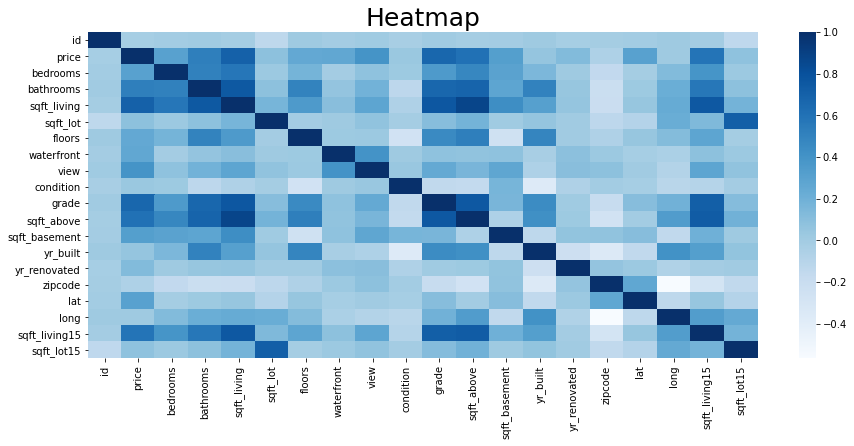

In [24]:
# Correlation matrix showing the correlation between the features
plt.figure(figsize=(15,6))
sns.heatmap(corr_matrix,cmap='Blues',annot=False) 
plt.title('Heatmap', fontsize=25);

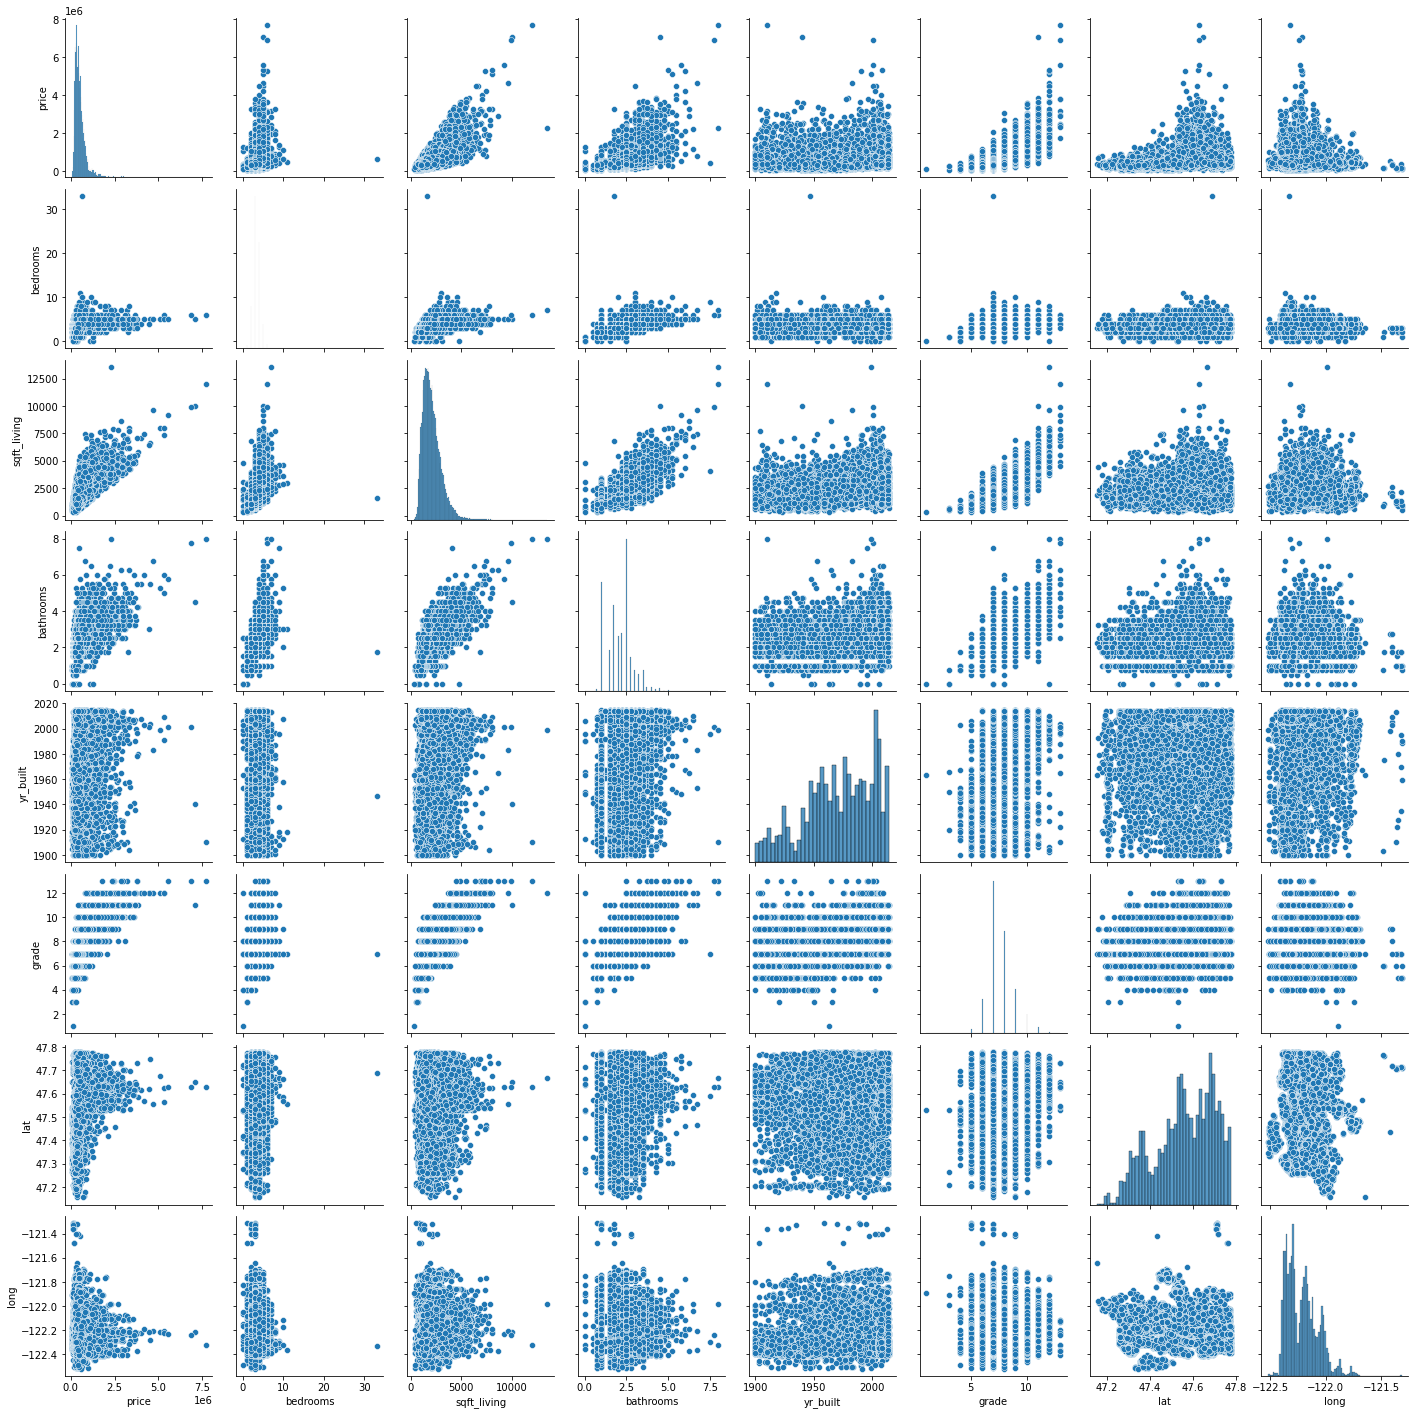

In [25]:
# Scatter plot showing the relationship between the selected features
df_sub = data[['price', 'bedrooms', 'sqft_living', 'bathrooms', 'yr_built', 'grade', 'lat', 'long']]
sns.pairplot(df_sub);

In [26]:
# Correlation between some selected features
data[['price','bathrooms','sqft_above','sqft_living']].corr()

price  bathrooms  sqft_above  sqft_living
price        1.000000   0.525138    0.605567     0.702035
bathrooms    0.525138   1.000000    0.685342     0.754665
sqft_above   0.605567   0.685342    1.000000     0.876597
sqft_living  0.702035   0.754665    0.876597     1.000000

# Correlation Analysis
The regression analysis for the following pairs are conducted
* Price vrs Bathroom
* Price vrs sqft_above
* Price vrs sqft_living


Text(0, 0.5, 'Price')

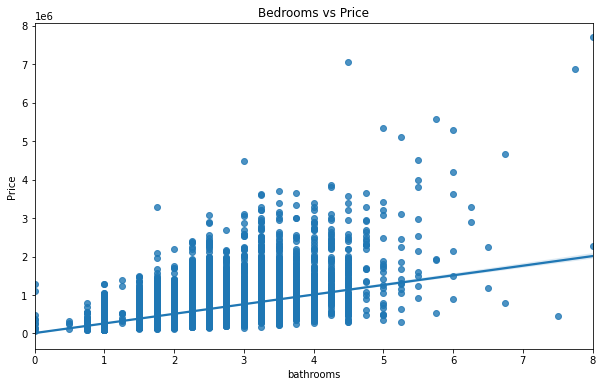

In [27]:
# Price vrs bathroom
plt.figure(figsize=(10,6))
sns.regplot(x = 'bathrooms', y = 'price', data = data)
plt.title("Bedrooms vs Price")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

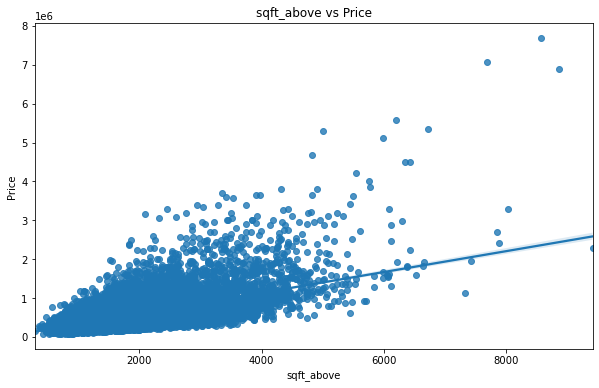

In [28]:
# Price vrs sqft_above
plt.figure(figsize=(10,6))
sns.regplot(x = 'sqft_above', y = 'price', data = data)
plt.title("sqft_above vs Price")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

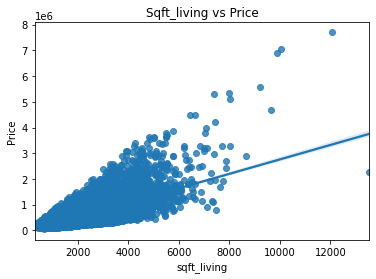

In [29]:
#Price vrs sqft_living
# Price vrs bathroom
sns.regplot(x = 'sqft_living', y = 'price', data = data)
plt.title("Sqft_living vs Price")
plt.ylabel("Price")

## Geographic Location

In [20]:
#df = px.data.tips()
plt.figure(figsize=(8,6))
#plt.title('Location of houses using latitude and longitutde')
fig = px.scatter(data, x='lat',y='long')
#plt.title('Location of houses using latitude and longitutde')
fig.show();

<Figure size 576x432 with 0 Axes>

# MACHINE LEARNING

In [22]:
data.head()

id             date   price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900         3       1.00         1180   
1  6414100192  20141209T000000  538000         3       2.25         2570   
2  5631500400  20150225T000000  180000         2       1.00          770   
3  2487200875  20141209T000000  604000         4       3.00         1960   
4  1954400510  20150218T000000  510000         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

## Feature Selection
The dataset conatins only numeric variables hence there isn't the need to encode.<br>
Standard scale the features <br>
The number of bathrooms contained floating point numbers.
Hence the need to convert the number of bathrooms to integers

In [32]:
data['bathrooms']=[int(i) for i in data['bathrooms']]
#data['bathrooms']=bath

y = data['price']
X = data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode','condition','grade','waterfront','view',
          'sqft_above','sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15']]

#SPLITTING THE TRAIN TEST SET
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [33]:
X_test.shape

(4323, 18)

# Model Selection, fitting and validation

### Linear Regression without scaling and tranforming

In [42]:
#LINEAR REGRESSION

reg1=lr().fit(X_train,y_train)
predicted_y=reg1.predict(X_test)

print('RMSE:\t',np.sqrt(metrics.mean_squared_error(y_test,predicted_y)))
print('MSE:\t', metrics.mean_squared_error(y_test,predicted_y))
print("R2: \t", metrics.r2_score(y_test, predicted_y))

RMSE:	 189978.0071763218
MSE:	 36091643210.68658
R2: 	 0.6965157367987019


## Ridge regression

In [37]:
from sklearn.linear_model import Ridge as Ridge
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train) 
ridge_predicted_y= ridge.predict(X_test)

print('RMSE:\t',np.sqrt(metrics.mean_squared_error(y_test,ridge_predicted_y)))
print('MSE:\t', metrics.mean_squared_error(y_test,ridge_predicted_y))
print("R2: \t", metrics.r2_score(y_test, ridge_predicted_y))

RMSE:	 189975.7873966006
MSE:	 36090799796.95839
R2: 	 0.6965228288225362


## Lasso Regression

In [38]:
Lasso = Ridge(alpha=0.01)
Lasso.fit(X_train, y_train) 
lasso_predicted_y= ridge.predict(X_test)

print('RMSE:\t',np.sqrt(metrics.mean_squared_error(y_test,lasso_predicted_y)))
print('MSE:\t', metrics.mean_squared_error(y_test,lasso_predicted_y))
print("R2: \t", metrics.r2_score(y_test, lasso_predicted_y))

RMSE:	 189975.7873966006
MSE:	 36090799796.95839
R2: 	 0.6965228288225362


## Decision Tree

In [39]:
#TRYING DECISION TREE ALGORITHM

t_reg = dt(random_state=2,max_leaf_nodes=5).fit(X_train,y_train)
pred_y=t_reg.predict(X_test)

print('RMSE:\t',np.sqrt(metrics.mean_squared_error(y_test,pred_y)))
print('MSE:\t', metrics.mean_squared_error(y_test,pred_y))
print("R2: \t", metrics.r2_score(y_test, pred_y))

RMSE:	 236575.84698270343
MSE:	 55968131375.5835
R2: 	 0.5293800558173782


## Random Forest

In [44]:
#Random Forest
rf_reg = rf(random_state=2,max_leaf_nodes=50).fit(X_train,y_train)
forest_pred_y=rf_reg.predict(X_test)

print('RMSE:\t',np.sqrt(metrics.mean_squared_error(y_test,forest_pred_y)))
print('MSE:\t', metrics.mean_squared_error(y_test,forest_pred_y))
print("R2: \t", metrics.r2_score(y_test, forest_pred_y))

RMSE:	 138267.14767408688
MSE:	 19117804125.92775
R2: 	 0.8392438752285464


## XGBoost

In [45]:
from xgboost import XGBRegressor

xg = XGBRegressor().fit(X_train, y_train)
xg_predicted_y=xg.predict(X_test)

print('RMSE:\t',np.sqrt(metrics.mean_squared_error(y_test,xg_predicted_y)))
print('MSE:\t', metrics.mean_squared_error(y_test,xg_predicted_y))
print("R2: \t", metrics.r2_score(y_test, xg_predicted_y))

RMSE:	 112098.79699676648
MSE:	 12566140288.122261
R2: 	 0.8943349349775315


## Transforming the dataset usinng Standard Scaler

* We can see that our numerical features are on different scales so we need to normalize the data. This way features are now more consistent with each other.
* Outliers from the data set will be lost when we normalize the data.

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# This does the same thing as the following code (data - data.mean()) / data.std()
sc = StandardScaler()

X_train_scaled = sc.fit_transform(X_train)

X_test_scaled = sc.transform(X_test)


## Linear Regression

In [50]:
lin_reg = lr().fit(X_train_scaled, y_train)
reg_predicted_y = lin_reg.predict(X_test_scaled)

print('RMSE:\t',np.sqrt(metrics.mean_squared_error(y_test,reg_predicted_y)))
print('MSE:\t', metrics.mean_squared_error(y_test,reg_predicted_y))
print("R2: \t", metrics.r2_score(y_test, reg_predicted_y))

RMSE:	 189978.00717631512
MSE:	 36091643210.68404
R2: 	 0.6965157367987233
